In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load your CSV
df = pd.read_csv("./data/weight.csv")

# Drop any rows with missing dates or weights
df = df.dropna(subset=['Date', 'Weight'])

# Your existing DataFrame
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

df.head()



,Date,Weight
0,2015-05-22,79.8
1,2016-09-27,79.5
2,2020-03-12,74.5
3,2020-03-23,73.5
4,2020-03-30,73.0


In [16]:
# Convert dates to ordinal for fitting
x = df['Date'].map(pd.Timestamp.toordinal)
y = df['Weight']

# Apply LOWESS
lowess = sm.nonparametric.lowess
smoothed = lowess(y, x, frac=0.3)  # frac controls smoothness

# print(smoothed)
print(x.min(), x.max())

print(smoothed[:, 0].min(), smoothed[:, 0].max())


735740 739376
735740.0 739376.0


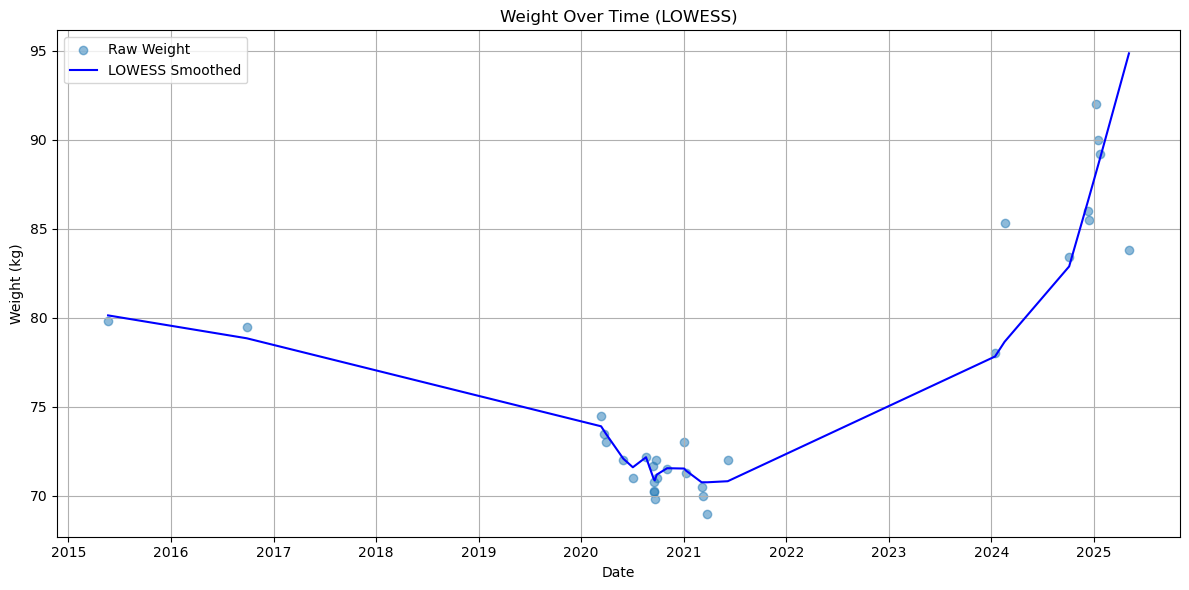

In [18]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Apply LOWESS
smoothed = sm.nonparametric.lowess(y, x, frac=0.3)
# dates = pd.to_datetime(smoothed[:, 0], origin='unix', unit='D')
smoothed_dates = [pd.Timestamp.fromordinal(int(val)) for val in smoothed[:, 0]]


# Plot
plt.figure(figsize=(12,6))
plt.scatter(df['Date'], df['Weight'], alpha=0.5, label='Raw Weight')
plt.plot(smoothed_dates, smoothed[:, 1], color='blue', label='LOWESS Smoothed')
plt.title('Weight Over Time (LOWESS)')
plt.xlabel('Date')
plt.ylabel('Weight (kg)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()